In [373]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [374]:
titanic = sns.load_dataset('titanic')

In [375]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [376]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [377]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Have a look at every details

In [378]:
for i in titanic.columns:
    if titanic[i].isnull().any() == True:
        print(titanic[i].value_counts(dropna=False))
        print(50*"*")

NaN       177
 24.00     30
 22.00     27
 18.00     26
 28.00     25
 19.00     25
 30.00     25
 21.00     24
 25.00     23
 36.00     22
 29.00     20
 32.00     18
 26.00     18
 35.00     18
 27.00     18
 16.00     17
 31.00     17
 34.00     15
 23.00     15
 33.00     15
 20.00     15
 39.00     14
 17.00     13
 42.00     13
 40.00     13
 45.00     12
 38.00     11
 50.00     10
 2.00      10
 4.00      10
         ... 
 28.50      2
 63.00      2
 0.83       2
 30.50      2
 70.00      2
 57.00      2
 0.75       2
 13.00      2
 59.00      2
 10.00      2
 64.00      2
 40.50      2
 45.50      2
 32.50      2
 20.50      1
 24.50      1
 0.67       1
 70.50      1
 0.92       1
 74.00      1
 34.50      1
 14.50      1
 80.00      1
 12.00      1
 53.00      1
 36.50      1
 55.50      1
 66.00      1
 23.50      1
 0.42       1
Name: age, Length: 89, dtype: int64
**************************************************
S      644
C      168
Q       77
NaN      2
Name: embarked,

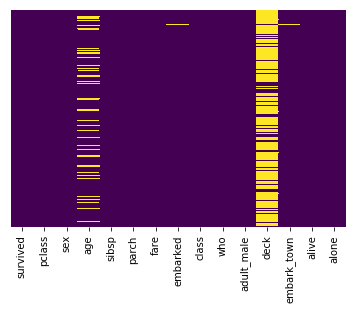

In [379]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

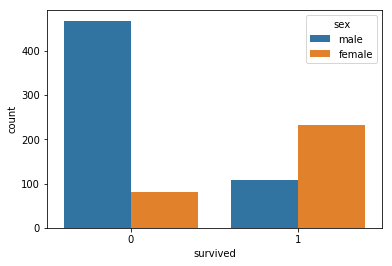

In [380]:
sns.countplot(x='survived', hue='sex', data=titanic)

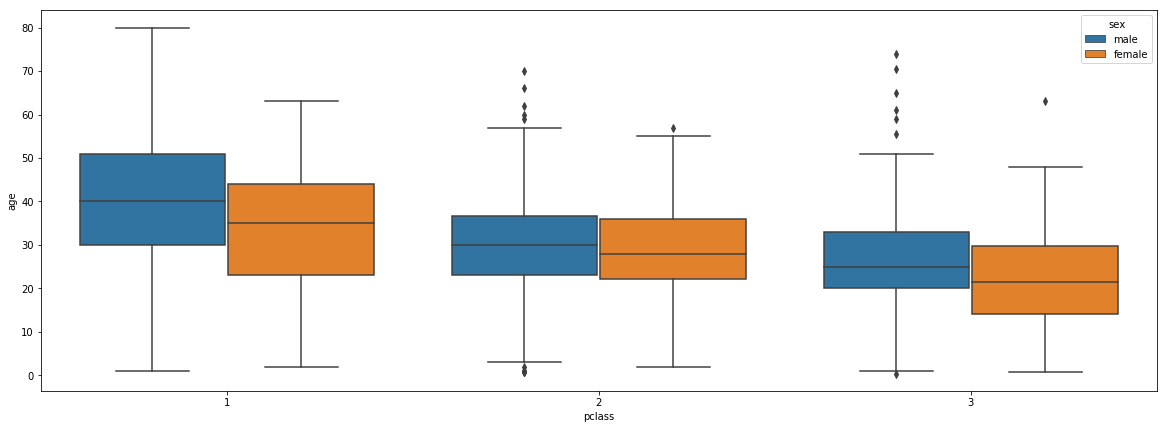

In [384]:
plt.figure(figsize=(20,7))
sns.boxplot(x='pclass', y='age',hue='sex', data=titanic)

In [184]:
# age_by_class = titanic[['pclass','age']].groupby('pclass').mean()
# age_mean = age_by_class.to_dict('series')
# agemeanDict=age_mean['age'].to_dict()

In [185]:
class_mean_age = titanic[['pclass','age']].groupby('pclass').mean().to_dict('series')['age'].to_dict()

# {1: 38.233440860215055, 2: 29.87763005780347, 3: 25.14061971830986}
class_mean_age

{1: 38.233440860215055, 2: 29.87763005780347, 3: 25.14061971830986}

In [186]:
def impute_age(cols):
    age = cols['age']
    pclass = cols['pclass']
    
    if pd.isnull(age):
        return class_mean_age[pclass]
    else:
        return age

In [187]:
titanic['age'] = titanic.apply(impute_age, axis=1)

In [188]:
class_sex_mean_age = titanic[['pclass','age','sex']].groupby(['sex','pclass']).mean()

# {1: 38.233440860215055, 2: 29.87763005780347, 3: 25.14061971830986}
class_sex_mean_age.loc['female'].loc[1]['age']

34.95852093342485

In [189]:
# {'male':{1:sekian, 2:sekian, 3:sekian}, "female":{1:sekian, 2:sekian, 3:sekian}}

In [190]:
median_ages = {}
value = {}

for i in titanic['sex'].unique():
    for j in titanic['pclass'].unique():
        value[j] = titanic[(titanic['sex'] == i)&(titanic['pclass'] == j)]['age'].dropna().mean()
    median_ages[i]=value
    value = {}
        
median_ages

{'male': {3: 26.137286033202063, 1: 40.756739820200934, 2: 30.66878398629844},
 'female': {3: 22.738930751173726,
  1: 34.95852093342485,
  2: 28.753358685731666}}

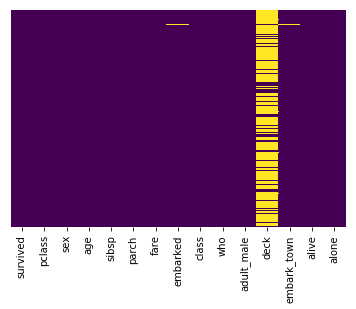

In [191]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [192]:
titanic.dropna(subset=['embarked'], inplace = True)

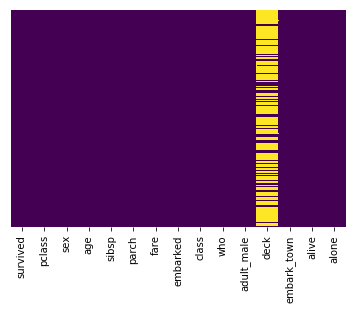

In [193]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [194]:
def impute_exist_deck(cols):
    deck = cols['deck']
    
    if pd.isna(deck):
        return 0
    else:
        return 1

In [195]:
titanic['exist_deck'] = titanic.apply(impute_exist_deck, axis=1)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,exist_deck
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [196]:
titanic.drop(['deck'], axis=1, inplace=True)

In [197]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,exist_deck
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,0


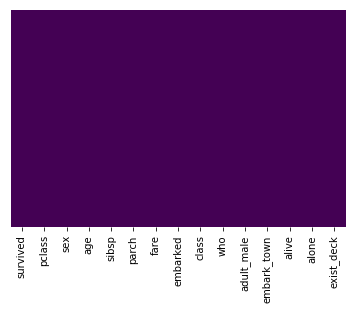

In [198]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [209]:
titanic_std = titanic.std()

In [369]:
def histodev(col, times):
    col_mean = titanic[col].mean()
    list_threshold = [col_mean - titanic[col].std()*times, col_mean + titanic[col].std()*times]
    temp = titanic[col].between(list_threshold[0], list_threshold[1])
    g = plt.figure(figsize=(10,7))
    g = sns.distplot(titanic[~temp][col], kde=False, color='r', bins=30)
    g = sns.distplot(titanic[temp][col], kde=False, color='b', bins=8)
#     g = sns.distplot(titanic[col], kde=False, color='y')
    plt.show()

In [370]:
# g = sns.distplot(titanic['age'], kde=False)
# g = sns.distplot(titanic['fare'], kde=False)
# plt.show()

C:\Users\Amri\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Amri\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


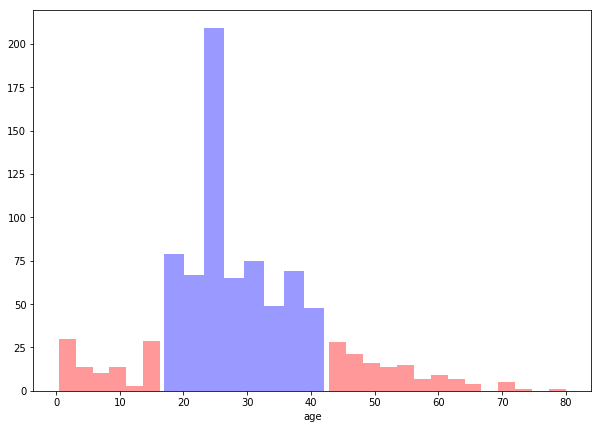

In [371]:
histodev('age', 1)